In [1]:
# Exploratory Analysis of the EEG data; Total features: 178, Class: 1; Instances: 11500
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
# reading the data file
eeg = pd.read_csv('eeg_data_1.csv')

In [46]:
# Information on data file
eeg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.7 MB


In [47]:
# First 5 rows
eeg.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [48]:
# Summary of attributes
eeg.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [49]:
# Last 5 rows
eeg.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,-47,-11,28,77,141,211,246,240,193,136,...,-65,-33,-7,14,27,48,77,117,170,1
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,121,135,148,143,116,86,68,59,55,3
11499,29,41,57,72,74,62,54,43,31,23,...,-59,-25,-4,2,5,4,-2,2,20,4


In [50]:
#Separating 2nd and 3rd rows
print (eeg[1:3])

    X1   X2   X3   X4   X5   X6   X7   X8   X9  X10 ...  X170  X171  X172  \
1  386  382  356  331  320  315  307  272  244  232 ...   164   150   146   
2  -32  -39  -47  -37  -32  -36  -57  -73  -85  -94 ...    57    64    48   

   X173  X174  X175  X176  X177  X178  y  
1   152   157   156   154   143   129  1  
2    19   -12   -30   -35   -35   -36  5  

[2 rows x 179 columns]


In [51]:
# Separating first 3 rows
e1 = eeg[:3]

In [52]:
print(e1)

    X1   X2   X3   X4   X5   X6   X7   X8   X9  X10 ...  X170  X171  X172  \
0  135  190  229  223  192  125   55   -9  -33  -38 ...   -17   -15   -31   
1  386  382  356  331  320  315  307  272  244  232 ...   164   150   146   
2  -32  -39  -47  -37  -32  -36  -57  -73  -85  -94 ...    57    64    48   

   X173  X174  X175  X176  X177  X178  y  
0   -77  -103  -127  -116   -83   -51  4  
1   152   157   156   154   143   129  1  
2    19   -12   -30   -35   -35   -36  5  

[3 rows x 179 columns]


In [53]:
# Information on columns
eeg.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       ...
       'X170', 'X171', 'X172', 'X173', 'X174', 'X175', 'X176', 'X177', 'X178',
       'y'],
      dtype='object', length=179)

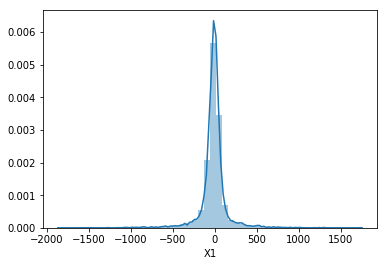

In [97]:
# Distribution of first column
sns.distplot(eeg.X1)

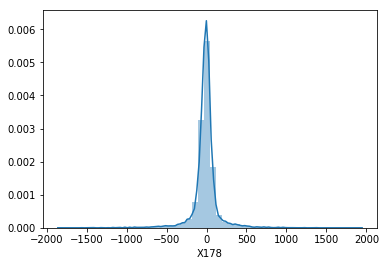

In [112]:
# Distribution of last column before the class attribute
sns.distplot(eeg.X178)

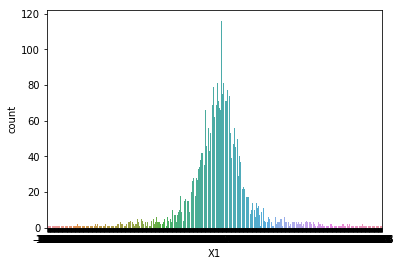

In [119]:
# Distribution of counts in one time stamp
sns.countplot(x='X1', data=eeg)

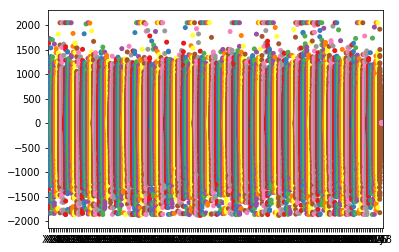

In [118]:
# spread of positive and negative values over all attributes
sns.stripplot(data=eeg, jitter=True, palette='Set1')

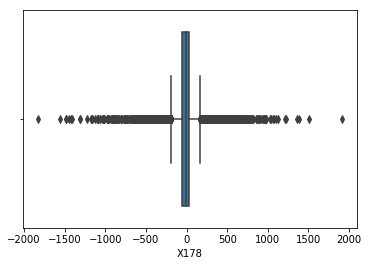

In [133]:
# outlier check on attribute X178
sns.boxplot(x='X178', data=eeg)

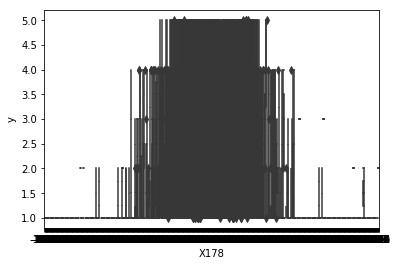

In [114]:
# qualitative statistic w.r.t. different class
sns.boxplot(x='X178', y='y', data=eeg, palette='coolwarm')

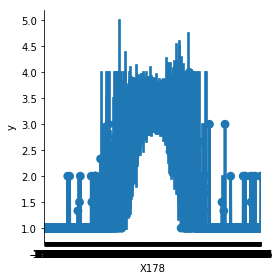

In [115]:
sns.factorplot(x='X178', y='y', data=eeg);

In [56]:
# Separating 3rd row only
E2 = eeg.iloc[2]

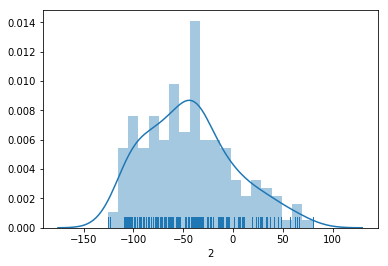

In [60]:
# distribution in the 3rd row 
sns.distplot(E2, bins=20, kde=True, rug=True)

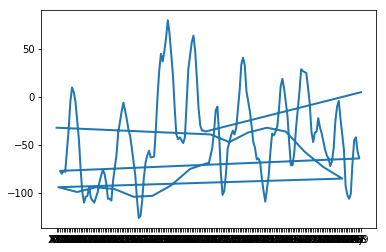

In [80]:
# frequency across 3rd row
plt.plot(E2, lw=2)

(array([  2.,  10.,  14.,  10.,  14.,  11.,  18.,  12.,  26.,  11.,  11.,
         10.,   6.,   4.,   6.,   5.,   4.,   1.,   3.,   1.]),
 array([-126. , -115.7, -105.4,  -95.1,  -84.8,  -74.5,  -64.2,  -53.9,
         -43.6,  -33.3,  -23. ,  -12.7,   -2.4,    7.9,   18.2,   28.5,
          38.8,   49.1,   59.4,   69.7,   80. ]),
 <a list of 20 Patch objects>)

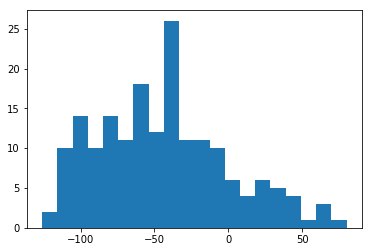

In [74]:
# Histogram of 3rd row
plt.hist(E2, bins=20)

In [108]:
# Separating 100th row 
E100= eeg.iloc[100]

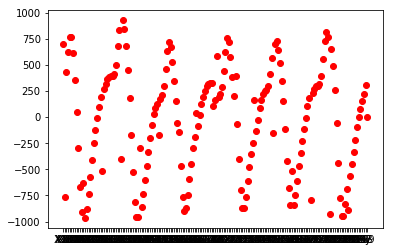

In [110]:
# scatter plot of 100th row 
plt.plot(E100, 'ro')

In [85]:
# Class attribute and its distribution
Y = eeg.y

(array([ 2300.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,  2300.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2300.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,  2300.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2300.]),
 array([ 1.  ,  1.08,  1.16,  1.24,  1.32,  1.4 ,  1.48,  1.56,  1.64,
         1.72,  1.8 ,  1.88,  1.96,  2.04,  2.12,  2.2 ,  2.28,  2.36,
         2.44,  2.52,  2.6 ,  2.68,  2.76,  2.84,  2.92,  3.  ,  3.08,
         3.16,  3.24,  3.32,  3.4 ,  3.48,  3.56,  3.64,  3.72,  3.8 ,
         3.88,  3.96,  4.04,  4.12,  4.2 ,  4.28,  4.36,  4.44,  4.52,
         4.6 ,  4.68,  4.76,  4.84,  4.92,  5.  ]),
 <a list of 50 Patch objects>)

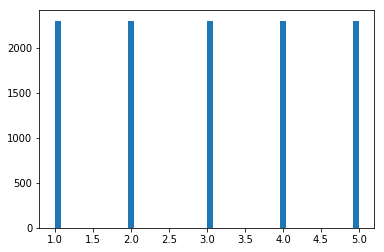

In [89]:
# Total number of cases in all classes; shows equal number of entries in each class
plt.hist(Y, bins=50)

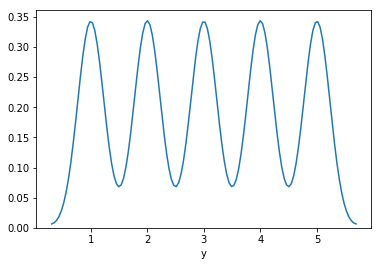

In [92]:
# Distribution of class values
sns.distplot(Y, hist=False)

In [103]:
# Mean values w.r.t. different class at timestamp X1
eeg.groupby('y').mean()['X1']

y
1   -21.936522
2    -7.710000
3    -9.207391
4   -12.726087
5    -6.326957
Name: X1, dtype: float64

In [116]:
# Mean values w.r.t. different class at timestamp X178
eeg.groupby('y').mean()['X178']

y
1   -24.016522
2    -8.147391
3    -8.935217
4   -12.914783
5    -6.964348
Name: X178, dtype: float64

In [120]:
# Mean values w.r.t. different class at timestamp X100
eeg.groupby('y').mean()['X100']

y
1    -4.706957
2    -3.762609
3    -7.367391
4   -13.959565
5    -6.549565
Name: X100, dtype: float64

In [128]:
# Counting total number of epileptic cases over on a single timestamp
Epi_X1 = sum(eeg[eeg['y']==1]['X1'].value_counts()==1)

In [129]:
Epi_X1

473

In [139]:
Epi_X178 = sum(eeg[eeg['y']==1]['X178'].value_counts()==1)

In [140]:
Epi_X178

461

In [147]:
Epi_X100 = sum(eeg[eeg['y']==1]['X100'].value_counts()==1)

In [142]:
Epi_X100

518